In [2]:
# ============================
# ML Supervisado - Reducción de dimensionalidad (PCA) + K-Means
# Primera base de datos: Iris
# ============================

import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt


In [4]:
# Cargar la base de datos Iris
iris = load_iris()
X = iris.data          # variables numéricas
y = iris.target        # clases verdaderas (no las usaremos para el clustering)

# Crear un DataFrame con nombres de columnas
df_iris = pd.DataFrame(X, columns=iris.feature_names)

# Mostrar las primeras filas
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# ============================
# Escalado de los datos
# ============================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mostrar las primeras 5 filas escaladas
X_scaled[:5]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [8]:
# ============================
# Reducción de dimensionalidad con PCA (2 componentes)
# ============================

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

# Mostrar las primeras filas transformadas
X_pca[:5]


Varianza explicada por cada componente:
[0.72962445 0.22850762]


array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [10]:
# ============================
# K-Means para k = 2, 4 y 5
# Cálculo del Silhouette Score
# ============================

ks = [2, 4, 5]
silhouette_scores = {}

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_pca)  # usamos X_pca para graficar en 2D

    score = silhouette_score(X_pca, labels)
    silhouette_scores[k] = score

    print(f"k = {k}, Silhouette Score = {score:.4f}")


k = 2, Silhouette Score = 0.6145
k = 4, Silhouette Score = 0.4452
k = 5, Silhouette Score = 0.4111


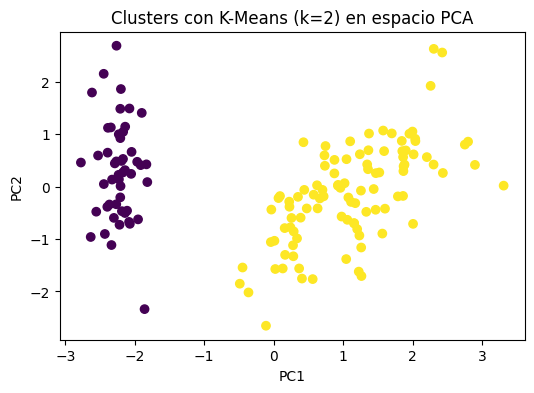

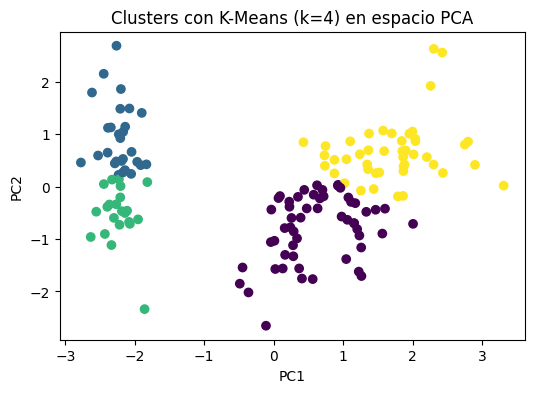

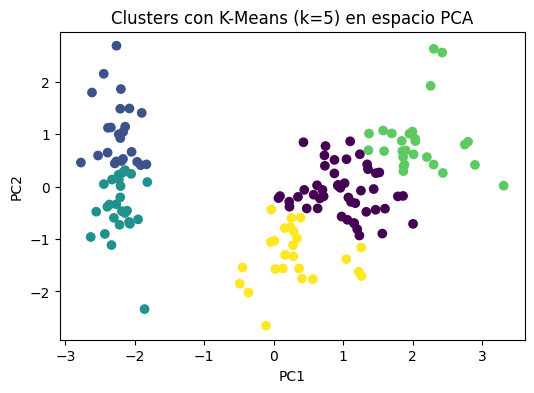

In [12]:
# ============================
# Gráficas de los clusters para k = 2, 4 y 5
# ============================

def graficar_clusters(k, X_pca):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_pca)

    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.title(f'Clusters con K-Means (k={k}) en espacio PCA')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(False)
    plt.show()

# Graficar para cada k
for k in [2, 4, 5]:
    graficar_clusters(k, X_pca)


In [14]:
# ============================
# Segunda base de datos: Wine
# ============================

from sklearn.datasets import load_wine

wine = load_wine()
X2 = wine.data
y2 = wine.target

df_wine = pd.DataFrame(X2, columns=wine.feature_names)
df_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [16]:
# ============================
# Escalado de la base de datos Wine
# ============================

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# Mostrar las primeras filas escaladas
X2_scaled[:5]


array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [18]:
# ============================
# PCA con 2 componentes para Wine
# ============================

pca2 = PCA(n_components=2)
X2_pca = pca2.fit_transform(X2_scaled)

print("Varianza explicada por cada componente:")
print(pca2.explained_variance_ratio_)

# Mostrar primeras filas transformadas
X2_pca[:5]


Varianza explicada por cada componente:
[0.36198848 0.1920749 ]


array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082]])

In [20]:
# ============================
# K-Means para k = 2, 4 y 5 en Wine
# Cálculo del Silhouette Score
# ============================

ks = [2, 4, 5]
silhouette_scores_wine = {}

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels2 = kmeans.fit_predict(X2_pca)

    score2 = silhouette_score(X2_pca, labels2)
    silhouette_scores_wine[k] = score2

    print(f"k = {k}, Silhouette Score (Wine) = {score2:.4f}")


k = 2, Silhouette Score (Wine) = 0.4750
k = 4, Silhouette Score (Wine) = 0.4914
k = 5, Silhouette Score (Wine) = 0.4499


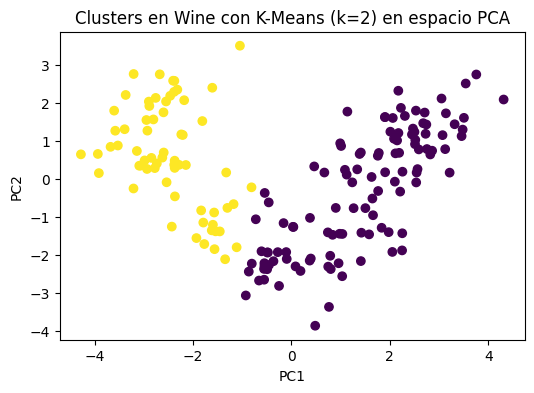

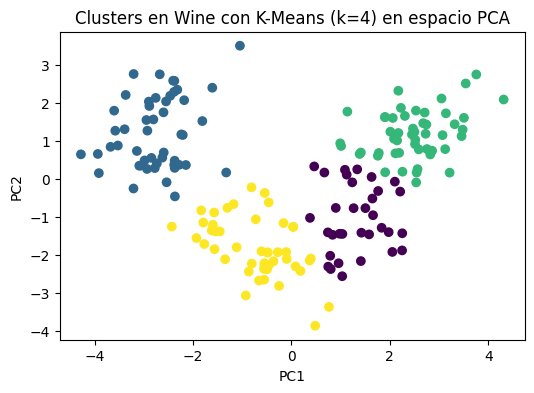

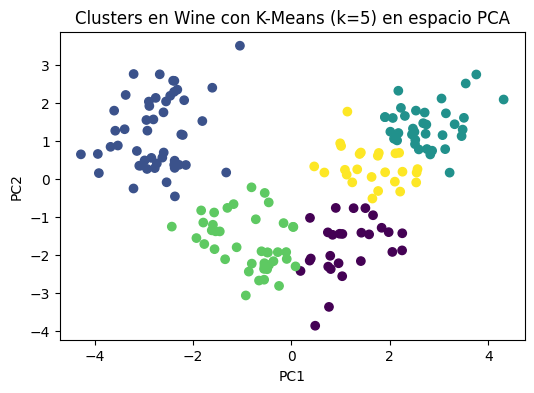

In [21]:
# ============================
# Gráficas de los clusters para Wine (k = 2, 4 y 5)
# ============================

def graficar_clusters_wine(k, X2_pca):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels2 = kmeans.fit_predict(X2_pca)

    plt.figure(figsize=(6, 4))
    plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=labels2, cmap='viridis')
    plt.title(f'Clusters en Wine con K-Means (k={k}) en espacio PCA')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(False)
    plt.show()

# Generar las tres gráficas
for k in [2, 4, 5]:
    graficar_clusters_wine(k, X2_pca)
